In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [2]:
## reading the csv file
df=pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## fill the missing parameters and removed the user_ID

df["Product_Category_2"].fillna(value=int(df["Product_Category_2"].mean()),inplace=True)
df["Product_Category_3"].fillna(value=int(df["Product_Category_3"].mean()),inplace=True)
df.drop(columns=["User_ID"],axis=1,inplace=True)

In [4]:
## Label encoder

encoder=LabelEncoder()

df["Product_ID"]=encoder.fit_transform(df["Product_ID"])
df["Gender"]=encoder.fit_transform(df["Gender"])
df["Age"]=encoder.fit_transform(df["Age"])
df["Occupation"]=encoder.fit_transform(df["Occupation"])
df["City_Category"]=encoder.fit_transform(df["City_Category"])
df["Stay_In_Current_City_Years"]=encoder.fit_transform(df["Stay_In_Current_City_Years"])
df["Marital_Status"]=encoder.fit_transform(df["Marital_Status"])
df["Product_Category_1"]=encoder.fit_transform(df["Product_Category_1"])
df["Product_Category_2"]=encoder.fit_transform(df["Product_Category_2"])
df["Product_Category_3"]=encoder.fit_transform(df["Product_Category_3"])
#df["Purchase"]=encoder.fit_transform(df["Purchase"])

df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,670,0,0,10,0,2,0,2,7,8,8370
1,2374,0,0,10,0,2,0,0,4,10,15200
2,850,0,0,10,0,2,0,11,7,8,1422
3,826,0,0,10,0,2,0,11,12,8,1057
4,2732,1,6,16,2,4,0,7,7,8,7969


In [5]:
## Spilting the data set

columns_x=df.columns
columns_x=columns_x[0:len(columns_x)-1]
x=df[columns_x].values
y=df["Purchase"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [6]:
# Apply the Random Forest Regressor

random_forest_reg=RandomForestRegressor(n_estimators=10)


In [7]:
# fit the model

random_forest_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [8]:
# Calculate the mean absolute error
print("Accuracy for train data =",metrics.mean_absolute_error(y_train,random_forest_reg.predict(x_train))
)
print("\nAccuracy for test data =",metrics.mean_absolute_error(y_test,random_forest_reg.predict(x_test))
)

Accuracy for train data = 966.6080218085445

Accuracy for test data = 2183.348558253245


In [9]:
random_forest_reg.score(x_train,y_train)

0.915911540729552

In [10]:
random_forest_reg.score(x_test,y_test)

0.6426287510948501

In [11]:
score_train=[]
score_test=[]
for i in range(5, 25):
    random_forest_reg=RandomForestRegressor(n_estimators=i)
    random_forest_reg.fit(x_train,y_train)
    score_train.append(random_forest_reg.score(x_train,y_train))
    score_test.append(random_forest_reg.score(x_test,y_test))

In [26]:
train_score=np.array(score_train)
train_score

array([0.8995375 , 0.90527743, 0.90912848, 0.91196378, 0.91415666,
       0.9159418 , 0.91738747, 0.91879063, 0.9196071 , 0.92048949,
       0.92125872, 0.92187764, 0.9226211 , 0.92308395, 0.9235747 ,
       0.92396718, 0.92430852, 0.92468055, 0.92483198, 0.92530974])

In [25]:
test_score=np.array(score_test)
test_score

array([0.61849357, 0.62905242, 0.63227009, 0.63785323, 0.64046913,
       0.64250313, 0.64625604, 0.64684809, 0.64884447, 0.64972144,
       0.65062642, 0.65193418, 0.65363861, 0.65427304, 0.65521907,
       0.65521949, 0.65602567, 0.65575268, 0.65747489, 0.6578965 ])

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x_axis, train_score)
plt.xlabel("n_estimators")
plt.ylabel("training score")
plt.title("Taining score vs no of trees")

NameError: name 'x_axis' is not defined

In [ ]:
plt.scatter(x_axis, test_score)
plt.xlabel("n_estimators")
plt.ylabel("test score")
plt.title("Test score vs no of trees")

In [17]:
#TraINING SCORE VS NO OF TRAINING INPUT
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
testt_size=np.arange(0.1, 0.52, 0.02)

In [18]:
testt_size

array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 ,
       0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ])

In [46]:
score_=[]
for i in testt_size:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i)
    random_forest_reg=RandomForestRegressor(n_estimators=10)
    random_forest_reg.fit(x_train,y_train)
    score_.append(random_forest_reg.score(x_test,y_test))

Text(0.5, 1.0, 'Model score vs test data size')

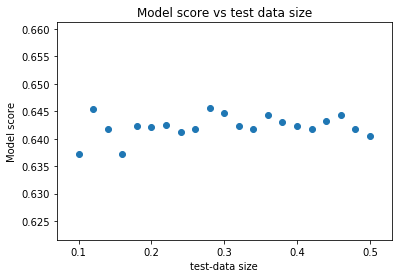

In [47]:
plt.scatter(testt_size, score_)
plt.xlabel("test-data size")
plt.ylabel("Model score")
plt.title("Model score vs test data size")

[0.6537842221645487,
 0.6499443407541114,
 0.6487132075626594,
 0.6526602069113526,
 0.6506031246893806,
 0.6507432957555654,
 0.6526520464794243,
 0.6509552588126473,
 0.650884194182729,
 0.6506274953685994,
 0.6515763003647719,
 0.6494346291892896,
 0.6516003875968331,
 0.6492256449113389,
 0.6530062037533666,
 0.6517441424662207,
 0.6506276391060194,
 0.6508990718672598,
 0.6519778897320241,
 0.6523194164712549,
 0.6533306751665644]

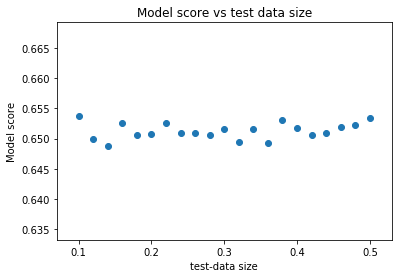

In [35]:
plt.scatter(testt_size, score_)
plt.xlabel("test-data size")
plt.ylabel("Model score")
plt.title("Model score vs test data size")
score_

No handles with labels found to put in legend.


array([0.8995375 , 0.90527743, 0.90912848, 0.91196378, 0.91415666,
       0.9159418 , 0.91738747, 0.91879063, 0.9196071 , 0.92048949,
       0.92125872, 0.92187764, 0.9226211 , 0.92308395, 0.9235747 ,
       0.92396718, 0.92430852, 0.92468055, 0.92483198, 0.92530974])

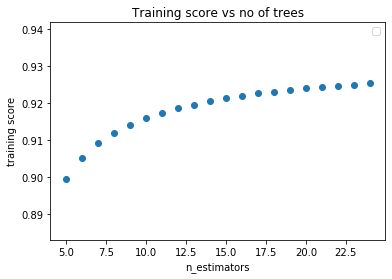

In [45]:
x_axis=np.arange(5,25)
import matplotlib.pyplot as plt
plt.scatter(x_axis, train_score)
plt.xlabel("n_estimators")
plt.ylabel("training score")
plt.title("Training score vs no of trees")
plt.legend()
train_score

Text(0.5, 1.0, 'Test score vs no of trees')

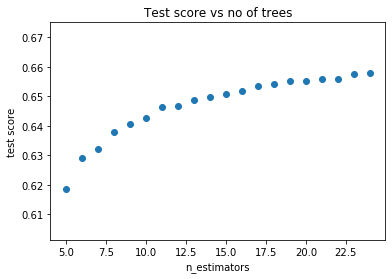

In [44]:
x_axis=np.arange(5,25)
import matplotlib.pyplot as plt
plt.scatter(x_axis, test_score)
plt.xlabel("n_estimators")
plt.ylabel("test score")
plt.title("Test score vs no of trees")

In [49]:
max(test_score)

0.6578964985494653